# Artificial Neural Network two inputs: volumetric flows air and H2 (2 inputs)

implemented using keras and tensorflow, these libraries must be installed before running the code in your python environment

In [1]:
#first import libraries ,seaborn and sys could be removed . The other ones cannot be removed
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import sklearn
import sys
sns.set(color_codes=True)
%matplotlib inline

Import data set
in folder 'Data' , the csv final 'Output_clean'.csv contains the data after removing outliers/anomalies
you can use another csv file changing the name of the file. 

In [2]:
df=pd.read_csv('Data/Output_clean.csv',header=None) # read csv using pandas, header=None, do not remove it

In [3]:
df #visualize data

,0,1,2,3,4,5,6,7,8,9,10
0,94.458523,0.014448,0.004,0.080611,1.632387,0.354659,1.645,0.355,24.875036,21.058426,0.546163
1,96.457336,0.015269,0.004,0.079133,1.630318,0.354858,1.645,0.355,24.948113,21.103978,0.547163
2,99.209307,0.018881,0.004,0.083402,1.630250,0.354951,1.645,0.355,25.032401,21.145084,0.547330
3,99.709000,0.017895,0.004,0.082253,1.629214,0.354794,1.645,0.355,25.032401,21.145084,0.547435
4,100.207719,0.018552,0.004,0.082253,1.629207,0.354854,1.645,0.355,25.056757,21.153972,0.547530
...,...,...,...,...,...,...,...,...,...,...,...
70533,226.734599,0.180430,0.004,0.671974,1.132338,0.862630,1.140,0.863,62.663953,43.950685,1.915064
70534,228.485564,0.178296,0.004,0.670332,1.132181,0.862975,1.140,0.863,62.708798,44.037465,1.916096
70535,228.985931,0.177803,0.004,0.670989,1.131987,0.862902,1.140,0.863,62.714613,44.021054,1.916262
70536,229.235369,0.180922,0.004,0.672795,1.131667,0.862855,1.140,0.863,62.714613,44.021054,1.916699


In [4]:
dataset=df.values #transform data to array

In [5]:
dataset #visualize data

array([[9.44585230e+01, 1.44480000e-02, 4.00000000e-03, ...,
        2.48750360e+01, 2.10584260e+01, 5.46163499e-01],
       [9.64573360e+01, 1.52690000e-02, 4.00000000e-03, ...,
        2.49481130e+01, 2.11039780e+01, 5.47163466e-01],
       [9.92093070e+01, 1.88810000e-02, 4.00000000e-03, ...,
        2.50324010e+01, 2.11450840e+01, 5.47329693e-01],
       ...,
       [2.28985931e+02, 1.77803000e-01, 4.00000000e-03, ...,
        6.27146130e+01, 4.40210540e+01, 1.91626184e+00],
       [2.29235369e+02, 1.80922000e-01, 4.00000000e-03, ...,
        6.27146130e+01, 4.40210540e+01, 1.91669929e+00],
       [2.30485925e+02, 1.80102000e-01, 4.00000000e-03, ...,
        6.27347770e+01, 4.40838910e+01, 1.91974510e+00]])

select inputs, columns 4 and 5 are the air and hydrogen volumetric flow, other inputs can be added such temperatures column 8 and 9 and others.No restriccion in the number of inputs.

In [6]:
X=dataset[:,[4,5]] # dataset[:,[input1,input2,..,inputn]]

In [7]:
print(X) #visualize inputs ,optional

[[1.632387 0.354659]
 [1.630318 0.354858]
 [1.63025  0.354951]
 ...
 [1.131987 0.862902]
 [1.131667 0.862855]
 [1.130047 0.862989]]


select output, here it is column 3: sensor measurements, there is no restriccion in the number of outputs

In [8]:
y=dataset[:,3] # dataset[:,[output1,output2,....,outputn]]

In [9]:
y  #visualize outputs (optional)

array([0.080611, 0.079133, 0.083402, ..., 0.670989, 0.672795, 0.672302])

data preprocessing

In [10]:
from sklearn import preprocessing 

In [11]:
# import train_teste_split to split data set in training,val and test data
# X:inputs, y=output , test_size=0.3 it can be other proportion, the recommendation is between 0.2-0.5
# 0.3 is a common recommendation, random_state=0 can be any number, it is used for splitting data set always
# in the same order when the program is running more than one time.

from sklearn.model_selection import train_test_split
X_train,X_val_test,y_train,y_val_test=train_test_split(X,y,test_size=0.3,random_state=0)#always in this order

In [12]:
# some people also use only a test set, it means test set=val+test set. In this program we split in in two
# different set. You can use both approaches, the one you here is a suggestion.
# test_size=0.5, it is because 0.5*0.3=0.15 will be validation test and 0.15 will be test set

X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5) 

In [13]:
# scaling inputs. In this project MinMaxScaler is used, it rescales inputs to an interval [0,1]
# other scaling can be used such as StandardScaler, this rescales inputs to a distribution with
# mean value=0, an standard deviation=1. We use the first one because it works better for our data set.

from sklearn.preprocessing import MinMaxScaler #import MinMaxScaler tool
minmax=MinMaxScaler()                          #instantiate MinMaxScaler
X_train=minmax.fit_transform(X_train)          # first fit MinMaxScaler to the training inputs
X_val=minmax.transform(X_val)                  # apply previous scaling to validation inputs
X_test=minmax.transform(X_test)                # apply scaling to test inputs

In [14]:
X_train #visualize training inputs after rescaling

array([[0.74702464, 0.24548935],
       [0.45414408, 0.55434738],
       [0.83126518, 0.17230913],
       ...,
       [0.74703779, 0.25761641],
       [0.74714869, 0.25776149],
       [0.08498861, 0.94269968]])

In [15]:
# import MinMaxScaler for rescaling outputs 
# same reasons explained above why we chose MinMaxScaler instead of StandardScaler
# observation: both inputs and output should be rescaled using the same tool: MinMaxScaler or StandardScaler

from sklearn.preprocessing import MinMaxScaler
minmax_output=MinMaxScaler()                    #instantiate MinMaxScaler for rescaling outputs

In [16]:
# outputs must be transpose using .reshape(len(outputs),1). This must be always made

y_train=minmax_output.fit_transform(y_train.reshape(len(y_train),1)) #first fit to training outputs
y_val=minmax_output.transform(y_val.reshape(len(y_val),1))           #apply rescaling to validation outputs
y_test=minmax_output.transform(y_test.reshape(len(y_test),1))        #apply rescaling to test outputs

In [17]:
print(X_train.shape,X_test.shape,y_test.shape) # check dimension of training, validation and tes set (optional)

(49376, 2) (10581, 2) (10581, 1)


Building the Artificial Neural Network (ANN)

In [18]:
# sequential is for given the structure of the ANN, define the sequence of input, hidden and output layers.
# Dense is the layer

from keras.models import Sequential
from keras.layers import Dense

In [21]:
# defining the model = Sequential([dense1,dense2,..,outputlayer]) always output layer at the end
# Dense(number of neurons, activation='activation function',input_shape=(dimension of inputs,))
# only in the FIRST hidden layer input_shape must be added
# next hidden layer only number of neurons and the activation function must be defined, program itself read
# the number of connections that comes from the previous layer. 
# example of the next hidden layers Dense(number of neurons, activation ='activation function')
#'activation function'='relu','linear','sigmoid','tanh','softmax' and many others
#'relu'=rectified linear, 'linear'=linear function,sigmoid=1/(1+exp(-x)) 'tanh'=hyperbolic tangent ,softmax=linear combination
# of sigmoid functions. Sigmoig, tanh, softmax and other are used for classification problems.
# output layer: Dense(dimension of outputs, activation='activation function')

model = Sequential([    Dense(200, activation='relu',input_shape=(2,)),Dense(200, activation='relu'),Dense(1, activation='linear')])# Dense(200, activation='relu'),Dense(200, activation='relu')

Training the ANN

In [22]:
model.summary()   #summary of the model: numbers of adaptative parameters per hidden layer and output layer

# define how model will be trained, model.compile(optimizer='optimizer',loss='mse')
# optimizer='sgd', 'adam','adaline'
# sgd=stochastic gradient descent, adam=adam optimizer and others. For regression problems, the best is sgd
# learning_rate=number can be added as parameter. if it is not added, the program assumes the
# defaul value that is 0.01.
# The default value of learning_rate is used in this work.
model.compile(optimizer='sgd', loss='mse') 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               600       
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 41,001
Trainable params: 41,001
Non-trainable params: 0
_________________________________________________________________


In [23]:
#running the model ,stime =time.time() is used for measuring the training time.
#hist=model.fit(inputs_train,outputs_train, batch_size=number, epochs=number,validation_data=(inputs_val,outputs_val))
# batch_size: number of training data per batch,in this work 32 is used. Other options may be aslso available.
# it must be taken into account bigger batch_size implies faster converge but more risk of getting stuck in an local 
# minima. This choice must be a trade-off between speed of convergence and ovoid local minima.
# epochs: numbers of feedforward and backpropagation over the whole training set. It can be as larger as we want 
# but if this number is so large more risk of overfitting , it should be defined looking loss and val_loss while
# the model is being trained.
# validation_data is used in order to visualize through the loss function if overfitting is ocurring.

stime = time.time()
hist = model.fit(X_train, y_train,          batch_size=32, epochs=200,          validation_data=(X_val, y_val))
print("Time for ANN fitting: %.3f" % (time.time() - stime))

Epoch 1/200
1543/1543 [==============================] - 2s 2ms/step - loss: 0.0086 - val_loss: 9.4217e-04
Epoch 2/200
1543/1543 [==============================] - 2s 2ms/step - loss: 7.4769e-04 - val_loss: 6.2359e-04
Epoch 3/200
1543/1543 [==============================] - 3s 2ms/step - loss: 5.7409e-04 - val_loss: 5.3544e-04
Epoch 4/200
1543/1543 [==============================] - 3s 2ms/step - loss: 5.1358e-04 - val_loss: 4.9685e-04
Epoch 5/200
1543/1543 [==============================] - 3s 2ms/step - loss: 4.8881e-04 - val_loss: 4.8356e-04
Epoch 6/200
1543/1543 [==============================] - 2s 2ms/step - loss: 4.7709e-04 - val_loss: 4.7509e-04
Epoch 7/200
1543/1543 [==============================] - 2s 2ms/step - loss: 4.7073e-04 - val_loss: 4.7001e-04
Epoch 8/200
1543/1543 [==============================] - 2s 2ms/step - loss: 4.6665e-04 - val_loss: 4.6499e-04
Epoch 9/200
1543/1543 [==============================] - 2s 2ms/step - loss: 4.6196e-04 - val_loss: 4.5971e-04
Epoch

In [24]:
# model is evaluated comparing predictions with test data. It provides the mean squared error
# model.evaluate(inputs_test,outputs_test)
model.evaluate(X_test, y_test)

331/331 [==============================] - 0s 1ms/step - loss: 3.4558e-04


0.0003455805126577616

Plotting loss function for training data and test data

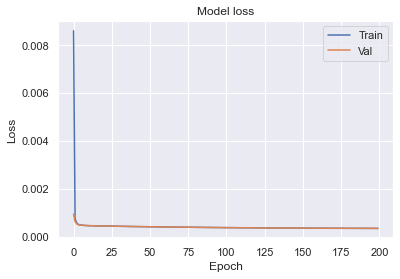

In [25]:
plt.plot(hist.history['loss']) #plot loss for training data
plt.plot(hist.history['val_loss']) #plot loss for val_loss
plt.title('Model loss')    #title, it can be changed by the user
plt.ylabel('Loss')         #y-label, shows loss is the most common label, user can change it
plt.xlabel('Epoch')        #x-label, shows epochs
plt.legend(['Train', 'Val'], loc='upper right') #legend
plt.show()

Statistical measures 

In [26]:
#import coefficient of determination and mean squared error
from sklearn.metrics import r2_score, mean_squared_error
# print mean square error and coefficient of determination for training data,test data with respect to
# predictions computed by the model.
# predictions are computed as follow: model.predict(inputs_train),model.predict(inputs_test)
print("mean square error training data: %.6f"% mean_squared_error(y_train,model.predict(X_train)))
print("mean square error test data: %.6f"% mean_squared_error(y_test,model.predict(X_test)))
print("R^2 training data: %.6f"% r2_score(y_train,model.predict(X_train)))
print("R^2 test data: %.6f"% r2_score(y_test,model.predict(X_test)))

mean square error training data: 0.000341
mean square error test data: 0.000346
R^2 training data: 0.997045
R^2 test data: 0.997036


In [27]:
# measuring time spent for ANN computing a new output
stime=time.time()
# always apply minmax.transform([[inputs]]) before computing a prediction using the ANN.
print(model.predict(minmax.transform([[1.644374,0.354820999999999]])))
print("Time for ANN predicting: %.3f" % (time.time() - stime))

[[0.0157835]]
Time for ANN predicting: 0.074


In [28]:
#for undo the scaling, use minmax_output.inverse_transform(model.predict...)
# example of how to obtain a prediction given in the line below:
#print(minmax_output.inverse_transform(model.predict(minmax.transform([[1.644374,0.354820999999999]]))))

Plotting results 

In [29]:
v_air=np.linspace(1.7,1.1,100) # air volumetric flows in decreasing order which implies increasing eq.ratios

In [30]:
v_H2=np.linspace(0.3,0.9,100) # H2 volumetric flows in increasing order which implies increasing eq.ratios

In [31]:
# compute equivalence ratios for a combination of air and hydrogen volumentric flows
rho_H2=0.0836 # hidrogen density m^3/kg
rho_air=1.1972 # air density m^3/kg
rho_N2=1.1639 # nitrogen density m^3/kg
rho_O2=1.3302 # oxigen density m^3/kg
st_ratio_H2_O2=0.125 # Stoichiometric ratio Hidrogen-oxigen
dilrat_air_mfr=4*rho_N2/rho_O2  # Dilation ratio air

# defining function to calculate equivalence ratios
def ratio(x,y):
    mfl_air=(x/1000)*(rho_air/60)
    mfl_H2=(y/1000)*(rho_H2/60)
    mfr_H2=mfl_H2/(mfl_air+mfl_H2)
    mfr_air=mfl_H2/(mfl_air+mfl_H2)
    mfr_O2=(1-mfr_H2)/(1+dilrat_air_mfr)
    return (mfr_H2/mfr_O2)/st_ratio_H2_O2
z=[]  #create list for prediction values
ratios=[] #create list for ratios

# routine to compute equivalence ratios and predicted values given by ANN
# inputs in the model bust be enter as a single array, like this example [[1.345,0.987]]
# always scale them , as follow minmax_input.transform([[1.345,0.987]])
# model.preditc([inputs])
# always undo the scaling of the output using minmax_output.inverse_transform(output)
for i in range(0,len(v_air)):
    z1=model.predict(minmax.transform(np.array([v_air[i],v_H2[i]]).reshape(1,-1)))
    z.append(minmax_output.inverse_transform(z1))    # adding output to list of outputs
    ratios.append(ratio(v_air[i],v_H2[i])) # adding eq.ratios to using function defined above

In [32]:
# computing from each data set the mean sensor measurements and mean equivalen ratio in order to plot them
# with the predicted values

import os #import library to read file from a specific directory

# counting number of files in a directory
max=0
for files in os.listdir('Data/Data_svenja_clean_0.4'):
    max=max+1
print(max)

mean_ratio=[]  # create list to save mean equivalence ratios
mean_sensor=[] # create list to save mean sensor measurements

#reading each file and calculating mean equivalence ratios and sensor measurements

for j in range(1,max):
    name=os.listdir('Data/Data_svenja_clean_0.4')[j]# reading first file and extracting its name
    print(name)    # checking names
    
    #reading file at location 'Data/Data_svenja_clean_0.4/' this location can be changed by the user
    dataset=pd.read_csv('Data/Data_svenja_clean_0.4/'+name,header=None)#reading csv file
    X1=dataset.values[:,:]    #converting to array
    mean1=np.mean(X1[:,10])   #computing mean equivalence ratio
    mean_ratio.append(mean1)  #adding previous mean equivalence ratio to list of equivalence ratios
    mean2=np.mean(X1[:,3])    #computing mean sensor measurements
    mean_sensor.append(mean2) #adding previous mean sensor measurements to a list of sensor measurements

33
data_0.5125_1_0.35_0.05.csv
data_0.525_1_0.35_0.05.csv
data_0.5375_1_0.35_0.05.csv
data_0.55_1_0.35_0.05.csv
data_0.5625_1_0.35_0.05.csv
data_0.575_1_0.35_0.05.csv
data_0.5875_1_0.35_0.05.csv
data_0.5_1_0.35_0.05.csv
data_0.6125_1_0.35_0.05.csv
data_0.625_1_0.35_0.05.csv
data_0.6375_1_0.35_0.05.csv
data_0.65_1_0.35_0.05.csv
data_0.6625_1_0.35_0.05.csv
data_0.675_1_0.35_0.05.csv
data_0.6875_1_0.35_0.05.csv
data_0.6_1_0.35_0.05.csv
data_0.7125_1_0.35_0.05.csv
data_0.725_1_0.35_0.05.csv
data_0.7375_1_0.35_0.05.csv
data_0.75_1_0.35_0.05.csv
data_0.7_1_0.35_0.05.csv
data_0.8_1_0.35_0.05.csv
data_0.9_1_0.35_0.05.csv
data_1.0_1_0.35_0.05.csv
data_1.1_1_0.35_0.05.csv
data_1.2_1_0.35_0.05.csv
data_1.3_1_0.35_0.05.csv
data_1.4_1_0.35_0.05.csv
data_1.5_1_0.35_0.05.csv
data_1.6_1_0.35_0.05.csv
data_1.7_1_0.35_0.05.csv
data_1.8_1_0.35_0.05.csv


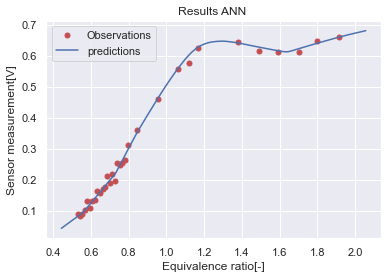

In [33]:
#plotting results
z=np.array(z) # converting list to an array
#print(z)
z=z.reshape(len(v_air),1) #converting to a column array
#print(z) #check the right shape of z (optional)
plt.plot(mean_ratio, mean_sensor, 'r.', markersize=10, label='Observations')  # plotting observations
plt.plot(ratios, z,'b-',label='predictions') #plotting predictions
plt.title('Results ANN ')#defining titles
plt.xlabel('Equivalence ratio[-]') #defining x-axis equivalen ratios
plt.ylabel('Sensor measurement[V]') #y-axis sensor measurements
plt.legend(loc='upper left') #adding a legend
plt.show()                   #show plot

Plotting heatmap for showing volumetrics flow respect to temperatures (optional, very time consuming around 1 hour plotting)

In [34]:
u=pd.read_csv('clustering_plot.csv',header=None).values[:,[1,2]]
u1=minmax.transform(u)
n=u1.shape[0]
x_plot=[]
y_plot=[]
for i in range(0,n):
    x_plot.append(u1[i][0])
    y_plot.append(u1[i][1])
#print(x_plot)
#print(y_plot)

In [31]:
for array in (x_plot,y_plot):
    temp = 0    
    for i in range(0, len(array)):  
        for j in range(i+1, len(array)):  
            if(array[i] > array[j]):  
                temp = array[i] 
                array[i] = array[j]  
                array[j] = temp
#print(np.size(x_plot))
#print(np.size(y_plot))
x_mesh,y_mesh=np.meshgrid(x_plot,y_plot)
stime=time.time()
z=[]
for j in range(0,np.size(x_plot)):
    for i in range(0,np.size(y_plot)):
        z1=model.predict([[x_plot[i],y_plot[j]]])
        z.append(minmax_output.inverse_transform(z1))
print("Time for ANN predicting: %.3f" % (time.time() - stime))

Time for ANN predicting: 5432.572


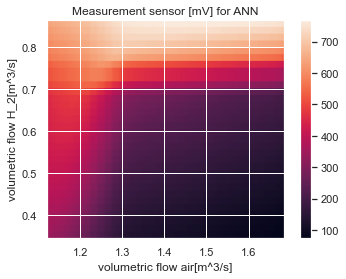

In [35]:
u2=pd.read_csv('clustering_plot.csv',header=None).values[:,[1,2]]
n=u2.shape[0]
x_plot_1=[]
y_plot_1=[]
for i in range(0,n):
    x_plot_1.append(u2[i][0])
    y_plot_1.append(u2[i][1])
for array in (x_plot_1,y_plot_1):
    temp = 0    
    for i in range(0, len(array)):  
        for j in range(i+1, len(array)):  
            if(array[i] > array[j]):  
                temp = array[i] 
                array[i] = array[j]  
                array[j] = temp
#print(x_plot_1)
#print(y_plot_1)
x_mesh_1,y_mesh_1=np.meshgrid(x_plot_1,y_plot_1)
        
z2=np.array(z)
#print(z2[1:10])
z_plot=np.reshape(z,newshape=(np.size(x_plot_1),np.size(y_plot_1)))
#print(z_plot)
plt.imshow(1000*z_plot,extent=[np.min(x_mesh_1),np.max(x_mesh_1),np.min(y_mesh_1),np.max(y_mesh_1)],interpolation=None,origin='lower')
#plt.contourf(x_mesh_1,y_mesh_1,z_plot)
plt.title('Measurement sensor [mV] for ANN')
plt.xlabel('volumetric flow air[m^3/s]')
plt.ylabel('volumetric flow H_2[m^3/s]')
plt.colorbar()
plt.show()